In [1]:
%load_ext autoreload
%autoreload 2
from model_symmetries.plotting import *

# Layer names for plots below

In [2]:
rn = resnet20()
relu_lyrs = [(l, n) for l, (n, m) in enumerate(rn.named_modules()) if isinstance(m, nn.ReLU)]
asterisks = [l for l, n in relu_lyrs if re.search('block_seq.*r1', n) != None]

In [3]:
rn18 = resnet18()
relu_lyrs18 = [(l, n) for l, (n, m) in enumerate(rn18.named_modules()) if isinstance(m, nn.ReLU)]
asterisks18 = [l for l, n in relu_lyrs18 if re.search('block_seq.*r1', n) != None]

# Plotting dissimilarity measures

## Procrustes measures

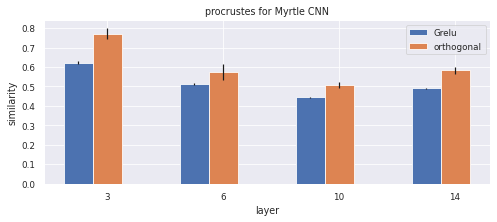

In [4]:
prodf, _, _ = alignment_map([align_dir/'mCNN-procrustes', align_dir/'mCNN-ortho_procrustes'], arch=mCNN, title='procrustes for Myrtle CNN', labels = ['Grelu', 'orthogonal'], diagonly=True)

In [5]:
print(prodf.to_latex())

\begin{tabular}{lllll}
\toprule
{} &          layer 3 &          layer 6 &         layer 10 &         layer 14 \\
\midrule
Grelu      &  0.6208 +- 0.008 &  0.5106 +- 0.005 &  0.4432 +- 0.004 &  0.4899 +- 0.002 \\
orthogonal &  0.7724 +- 0.028 &  0.5743 +- 0.040 &  0.5087 +- 0.016 &  0.5825 +- 0.019 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_11945/4175046500.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(prodf.to_latex())


### Constant width Myrtle CNN for comparison

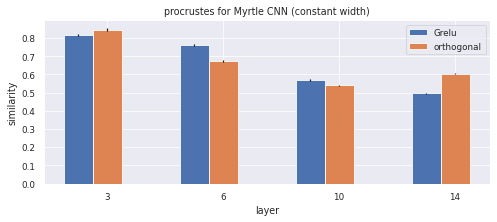

In [6]:
cwprodf, _, _ = alignment_map([align_dir/'cwCNN-procrustes', align_dir/'cwCNN-ortho_procrustes'], arch=cwCNN_bn_k, title='procrustes for Myrtle CNN (constant width)', labels = ['Grelu', 'orthogonal'], diagonly=True)

In [7]:
print(cwprodf.to_latex())

\begin{tabular}{lllll}
\toprule
{} &          layer 3 &          layer 6 &         layer 10 &         layer 14 \\
\midrule
Grelu      &  0.8176 +- 0.007 &  0.7602 +- 0.005 &  0.5691 +- 0.005 &  0.4971 +- 0.003 \\
orthogonal &  0.8460 +- 0.008 &  0.6735 +- 0.005 &  0.5409 +- 0.003 &  0.6050 +- 0.002 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_11945/1634484101.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cwprodf.to_latex())


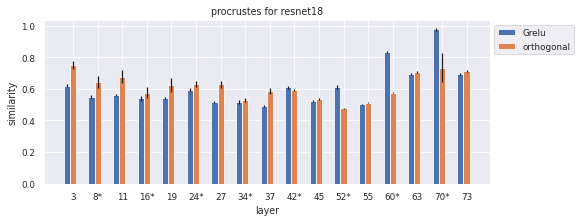

In [8]:
prodf_resnet18, fig, ax =  alignment_map([align_dir/'resnet18-procrustes', align_dir/'resnet18-ortho_procrustes'], arch=resnet18, title='procrustes for resnet18',  labels = ['Grelu', 'orthogonal'], diagonly=True, asterisks=asterisks18)

In [9]:
fig.savefig('plots/resnet18-procrustes.png', dpi=500, bbox_inches="tight")

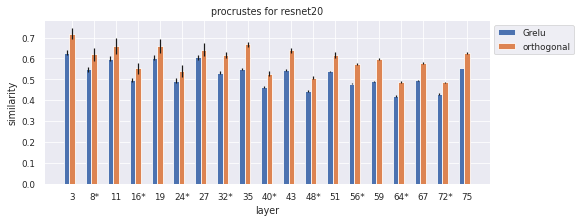

In [10]:
prodf_resnet20, fig, ax =  alignment_map([align_dir/'resnet20-procrustes', align_dir/'resnet20-ortho_procrustes'], arch=resnet20, title='procrustes for resnet20',  labels = ['Grelu', 'orthogonal'], diagonly=True, asterisks=asterisks)

In [11]:
fig.savefig('plots/resnet-procrustes.png', dpi=500, bbox_inches="tight")

## CKA measures

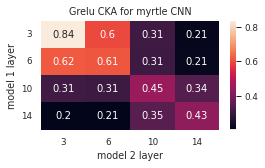

In [12]:
wckadf, fig, ax =alignment_map(align_dir/'mCNN-cka', arch=mCNN, title='Grelu CKA for myrtle CNN')

In [13]:
fig.savefig('plots/mCNN-GCKA.png', dpi=500, bbox_inches="tight")

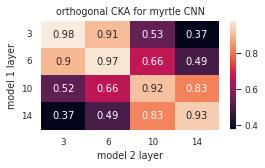

In [14]:
ockadf, fig, ax =alignment_map(align_dir/'mCNN-ortho_cka', arch=mCNN, title='orthogonal CKA for myrtle CNN')

In [15]:
fig.savefig('plots/mCNN-OCKA.png', dpi=500, bbox_inches="tight")

### Constant width for comparison

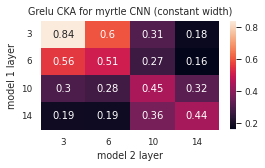

In [16]:
cwwckadf, fig, ax =alignment_map(align_dir/'cwCNN-cka', arch=cwCNN_bn_k, title='Grelu CKA for myrtle CNN (constant width)')

In [17]:
fig.savefig('plots/cwCNN-GCKA.png', dpi=500, bbox_inches="tight")

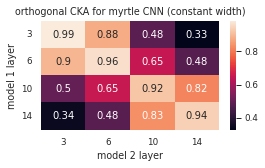

In [18]:
cwockadf, fig, ax =alignment_map(align_dir/'cwCNN-ortho_cka', arch=mCNN, title='orthogonal CKA for myrtle CNN (constant width)')

In [19]:
fig.savefig('plots/cwCNN-OCKA.png', dpi=500,bbox_inches="tight")

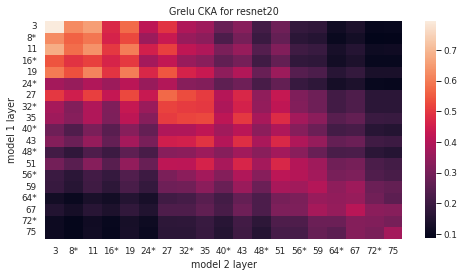

In [20]:
wckadf_resnet, fig, ax =alignment_map(align_dir/'resnet20-cka', arch=resnet20, title='Grelu CKA for resnet20', asterisks=asterisks)

In [21]:
fig.savefig('plots/resnet-GCKA.png', dpi=500, bbox_inches="tight")

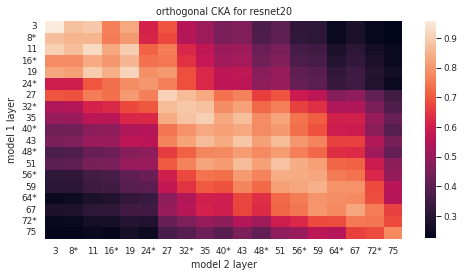

In [22]:
ockadf_resnet, fig, ax = wckadf =alignment_map(align_dir/'resnet20-ortho_cka', arch=resnet20, title='orthogonal CKA for resnet20', asterisks=asterisks)

In [23]:
fig.savefig('plots/resnet-OCKA.png', dpi=500, bbox_inches="tight")

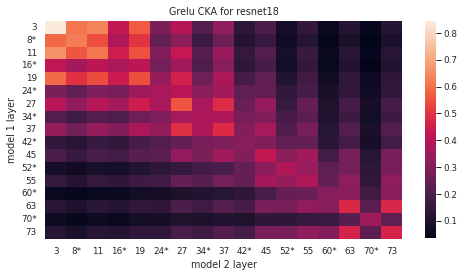

In [24]:
wckadf_resnet18, fig, ax =alignment_map(align_dir/'resnet18-cka', arch=resnet18, title='Grelu CKA for resnet18', asterisks=asterisks18)

In [25]:
fig.savefig('plots/resnet18-GCKA.png', dpi=500, bbox_inches="tight")

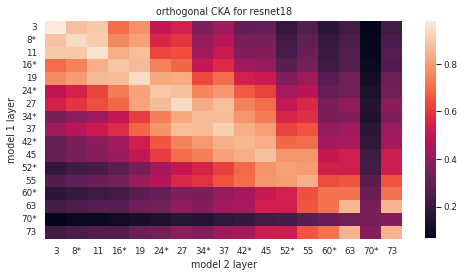

In [26]:
ockadf_resnet18, fig, ax = wckadf =alignment_map(align_dir/'resnet18-ortho_cka', arch=resnet18, title='orthogonal CKA for resnet18', asterisks=asterisks18)

In [27]:
fig.savefig('plots/resnet18-OCKA.png', dpi=500, bbox_inches="tight")


# Plotting stitching penalties

## Myrtle CNN

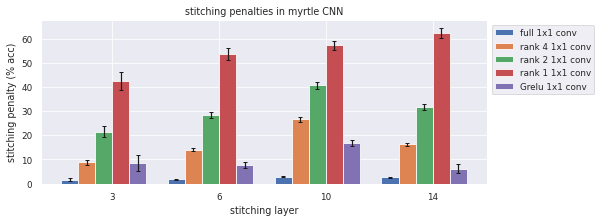

In [28]:
basenames = ['mCNNstandard', 'mCNNrank4', 'mCNNrank2', 'mCNNrank1', 
    # 'mCNNlasso1000', 'mCNNlasso100', 'mCNNlasso10', 
    'mCNNbirkhoff']
labels = ['full 1x1 conv', 'rank 4 1x1 conv', 'rank 2 1x1 conv', 'rank 1 1x1 conv', 
    # r'LASSO, $\lambda=1000$', r'LASSO, $\lambda=100$', r'LASSO, $\lambda=10$', 
    'Grelu 1x1 conv']
spdf, fig, ax = stitch_penalties(basename=basenames, arch=mCNN, title='stitching penalties in myrtle CNN', label=labels)

In [29]:
fig.savefig( 'plots/stitching-penalties-mCNN.png', dpi=500, bbox_inches="tight")

### Cross-validated results

mean clean accuracy:  91.36818590255592  +-  0.13442998944269421
mean clean accuracy:  91.3738019169329  +-  0.1187506354369566
mean clean accuracy:  91.41358201876997  +-  0.12323350263123056
mean clean accuracy:  91.44337809504792  +-  0.12093361855000397
mean clean accuracy:  91.39423796924919  +-  0.1280305266332603


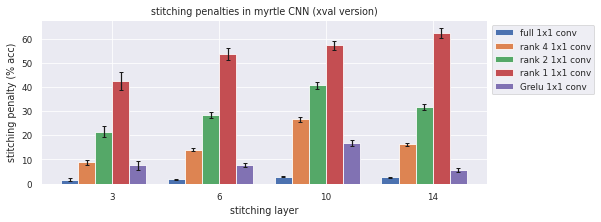

In [4]:
basenames = ['mCNNstandard', 'mCNNrank4', 'mCNNrank2', 'mCNNrank1', 
    'mCNNbirkhoff']
labels = ['full 1x1 conv', 'rank 4 1x1 conv', 'rank 2 1x1 conv', 'rank 1 1x1 conv', 
    'Grelu 1x1 conv']
cross_val = [False]*4 + [True]
cvspdf, fig, ax, alphas = stitch_penalties(basename=basenames, arch=mCNN, title='stitching penalties in myrtle CNN (xval version)', label=labels, cross_val=cross_val,debug_mode=True)

In [5]:
fig.savefig( 'plots/stitching-penalties-mCNN-crossval.png', dpi=500, bbox_inches="tight")

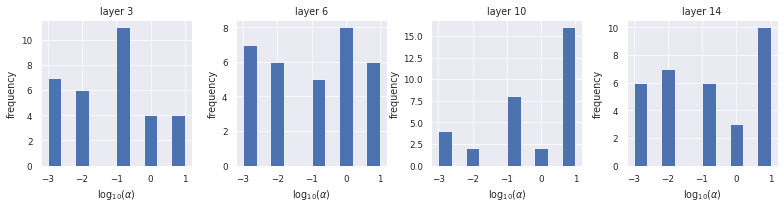

In [6]:
f, a = plt.subplots(1, len(alphas), figsize=(11, 3))
lrs = [3,6,10,14]
for i, l in enumerate(alphas):
    a[i].hist(np.log10(np.array(alphas[l])))
    a[i].set_xlabel(r'$\log_{10}(\alpha)$')
    a[i].set_ylabel('frequency')
    a[i].set_title(f'layer {str(lrs[i])}')
f.tight_layout()

In [8]:
f.savefig('plots/mCNN_best_alphas.png', dpi=500, bbox_inches="tight")

## ResNet 20

mean clean accuracy:  89.84062999201278  +-  0.17838916806799365
mean clean accuracy:  89.82066194089457  +-  0.14991500396336768
mean clean accuracy:  89.86839806309905  +-  0.15123995342597668
mean clean accuracy:  89.90303015175719  +-  0.09894509029459503
mean clean accuracy:  89.8989741413738  +-  0.1472005748768189


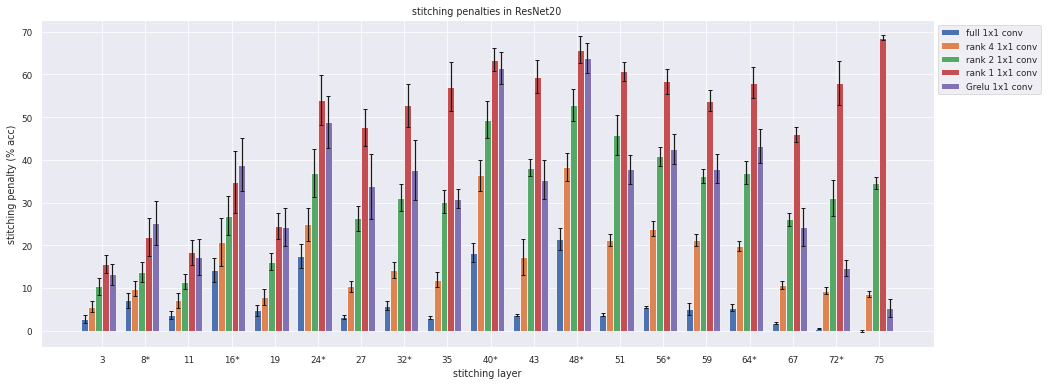

In [65]:
basenames = ['resnet20standard', 
    'resnet20rank4', 'resnet20rank2', 'resnet20rank1', 
    'resnet20birkhoff']
labels = ['full 1x1 conv', 'rank 4 1x1 conv', 'rank 2 1x1 conv', 'rank 1 1x1 conv', 'Grelu 1x1 conv']
spresnetdf, fig, ax = stitch_penalties(basename=basenames, arch=resnet20, title='stitching penalties in ResNet20', label=labels,
asterisks=asterisks
)

In [35]:
fig.savefig( 'plots/stitching-penalties-resnet.png', dpi=500, bbox_inches="tight")


### Cross-validated results

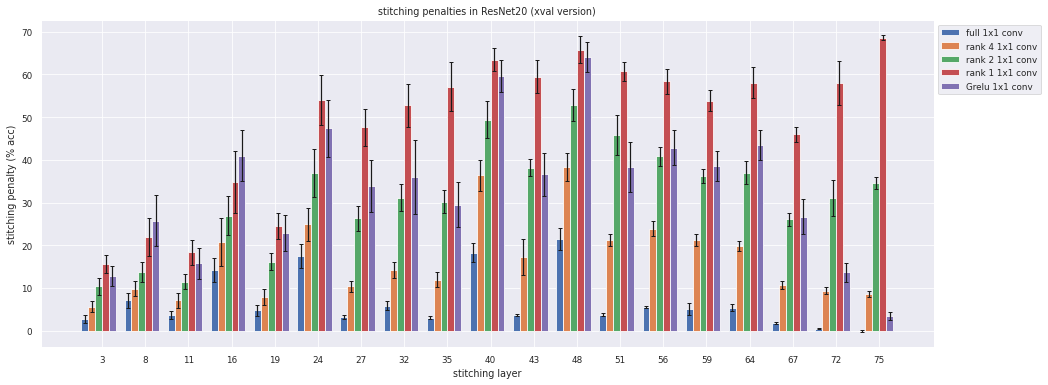

In [36]:
basenames = ['resnet20standard', 
    'resnet20rank4', 'resnet20rank2', 'resnet20rank1', 
    'resnet20birkhoff']
labels = ['full 1x1 conv', 'rank 4 1x1 conv', 'rank 2 1x1 conv', 'rank 1 1x1 conv', 'Grelu 1x1 conv']
cross_val = [False]*4 + [True]
cvspresnetdf, fig, ax, alphas = stitch_penalties(basename=basenames, arch=resnet20, title='stitching penalties in ResNet20 (xval version)', label=labels, cross_val=cross_val,debug_mode=True)

In [37]:
fig.savefig( 'plots/stitching-penalties-resnet-crossval.png', dpi=500, bbox_inches="tight")

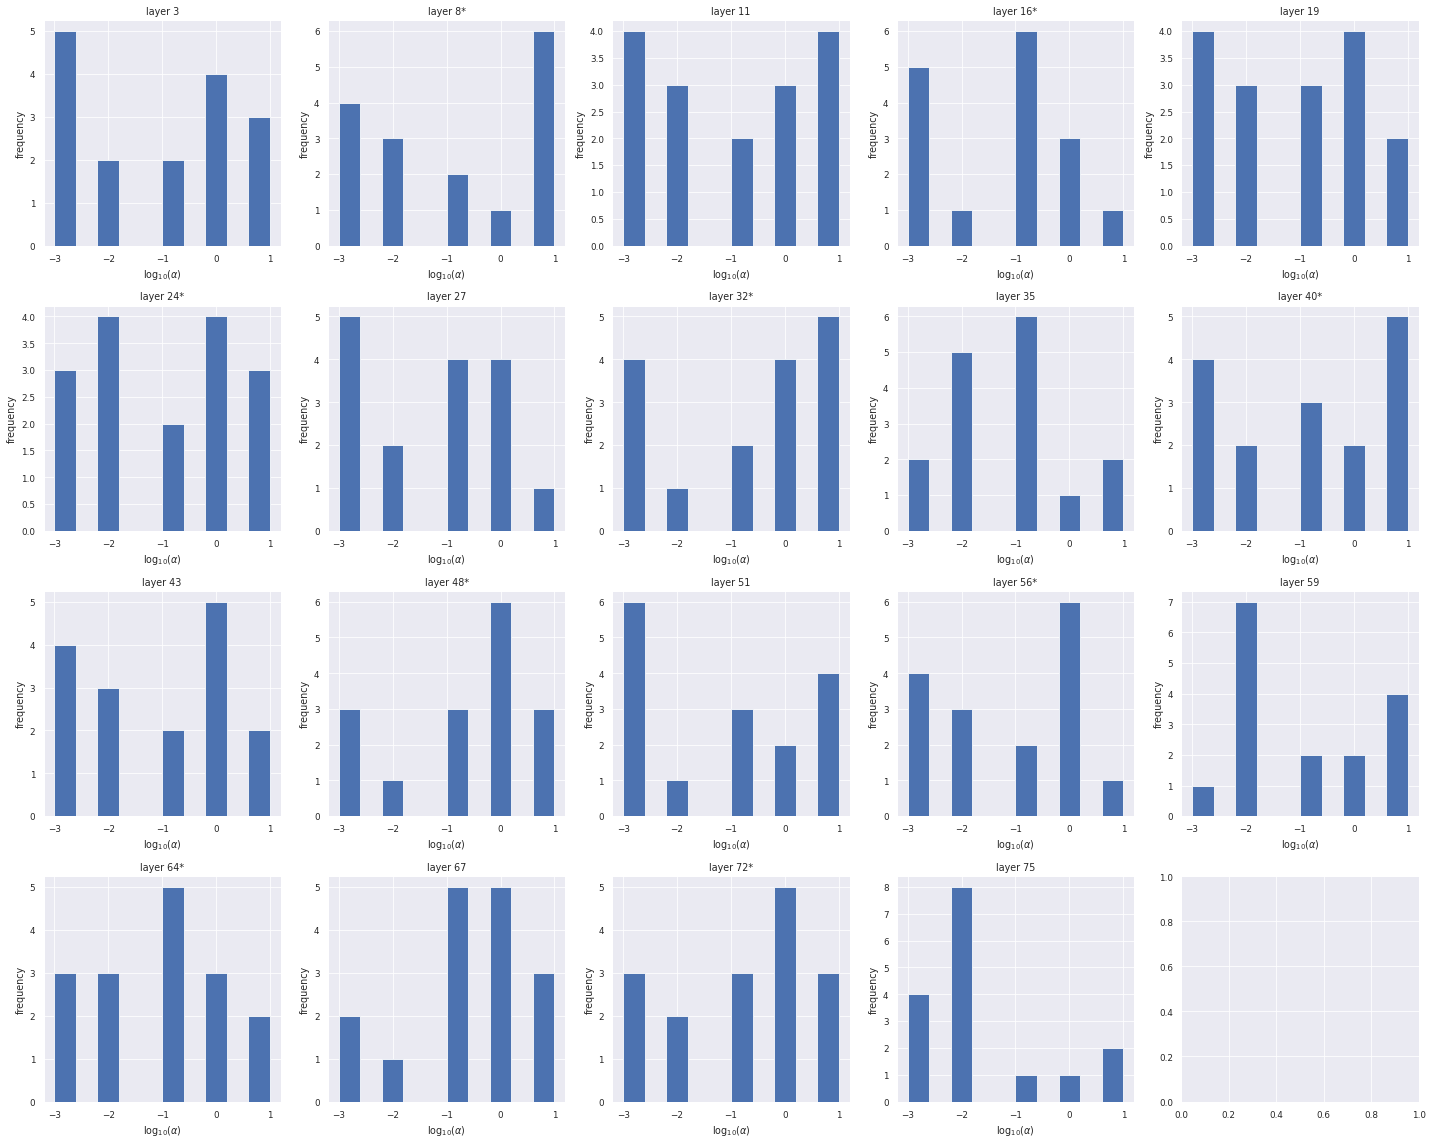

In [38]:
f, a = plt.subplots(4, 5, figsize=(20,16))
for i, l in enumerate(alphas):
    a[i//5, i%5].hist(np.log10(np.array(alphas[l])))
    a[i//5, i%5].set_xlabel(r'$\log_{10}(\alpha)$')
    a[i//5, i%5].set_ylabel('frequency')
    lyr_label = str(relu_lyrs[i][0]) +('*'if relu_lyrs[i][0] in asterisks else '')
    a[i//5, i%5].set_title(f'layer {lyr_label}')
f.tight_layout()

In [39]:
f.savefig('plots/resnet20_best_alphas.png', dpi=500, bbox_inches="tight")

## ResNet 18

mean clean accuracy:  92.96500599041534  +-  0.14194904865293836
mean clean accuracy:  92.99246206070288  +-  0.09019359756966487
mean clean accuracy:  92.93973392571885  +-  0.07755149995225845
mean clean accuracy:  92.99339806309905  +-  0.11830344567222034
mean clean accuracy:  92.95502196485623  +-  0.1163992983902847


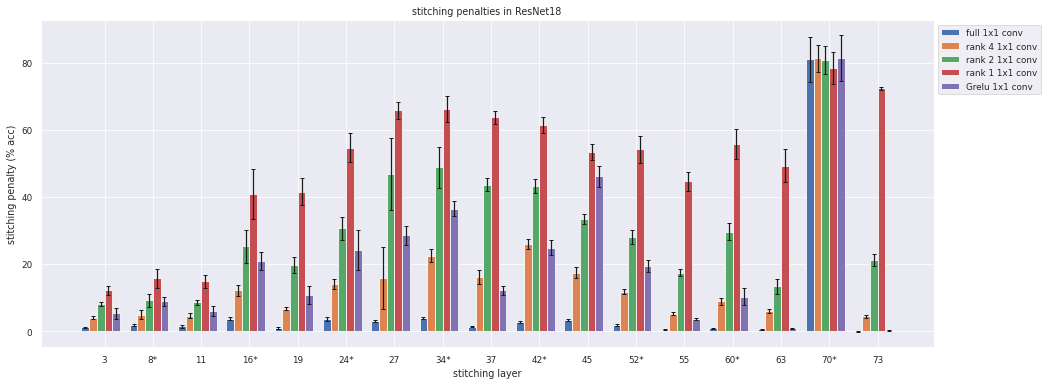

In [66]:

basenames = [
    'resnet18standard', 
    'resnet18rank4', 'resnet18rank2', 
    'resnet18rank1', 
    'resnet18birkhoff']
labels = [
    'full 1x1 conv', 
    'rank 4 1x1 conv', 'rank 2 1x1 conv', 
    'rank 1 1x1 conv', 
    'Grelu 1x1 conv']
spresnet18df, fig, ax = stitch_penalties(basename=basenames, arch=resnet20, title='stitching penalties in ResNet18', label=labels,
asterisks=asterisks18
)

In [41]:
fig.savefig( 'plots/stitching-penalties-resnet18.png', dpi=500, bbox_inches="tight")

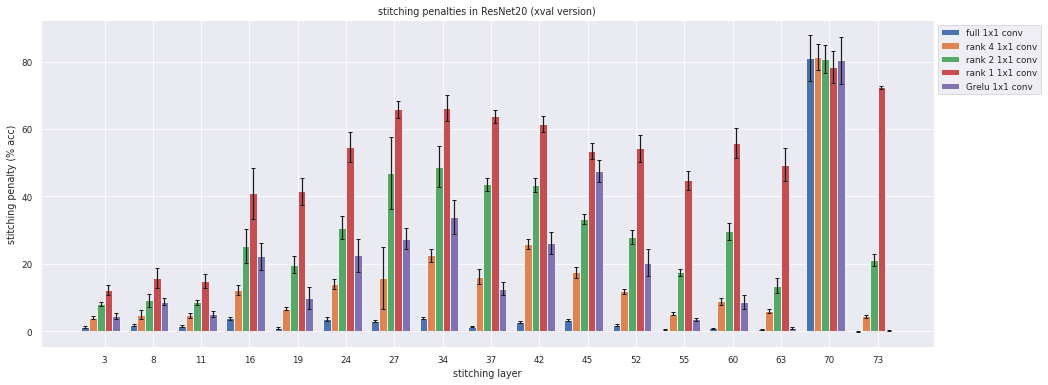

In [42]:
basenames = [
    'resnet18standard', 
    'resnet18rank4', 'resnet18rank2', 
    'resnet18rank1', 
    'resnet18birkhoff']
labels = [
    'full 1x1 conv', 'rank 4 1x1 conv', 'rank 2 1x1 conv', 'rank 1 1x1 conv', 
    'Grelu 1x1 conv']
cross_val = (
    [False]*4 + 
[True])
cvspresnet18df, fig, ax, alphas = stitch_penalties(basename=basenames, arch=resnet20, title='stitching penalties in ResNet20 (xval version)', label=labels, cross_val=cross_val,debug_mode=True)

In [43]:
fig.savefig( 'plots/stitching-penalties-resnet18-crossval.png', dpi=500, bbox_inches="tight")

# Rotation penalties

base acc 87.36022364217251


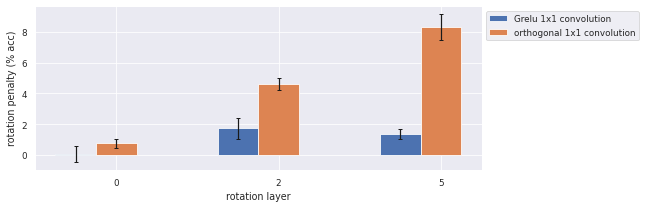

In [4]:
basenames = ['cifar10baseline_Grelu', 'cifar10baseline_orthogonal']
labels = ['Grelu 1x1 convolution', 'orthogonal 1x1 convolution']

df, fig, ax = rotation_penalties(basename=basenames, arch=mCNN_k, 
    # title='rotation penalties in Myrtle CNN (no BN)', 
    label=labels)

In [45]:
fig.savefig( 'plots/rotation-penalties.png', dpi=500, bbox_inches="tight")

# Lasso penalties vs sparsity

[3, 6, 10, 14]


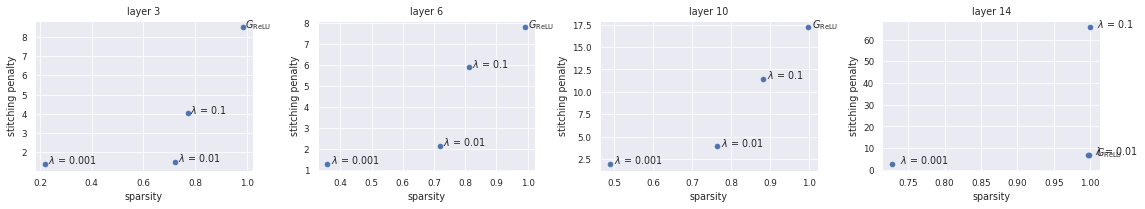

In [9]:
lambdas = [0.001, 0.01, 0.1, 
    # 1
    ]
basenames = ['mCNNlasso'+str(l) for l in lambdas]
fig, ax = lasso_penalties(basename=basenames, lambdas=lambdas)

In [10]:
fig.savefig('plots/mCNN_lasso.png', dpi=500, bbox_inches="tight")

# Torchinfo summaries of architectures

In [48]:
from torchinfo import summary

In [49]:
f = mCNN_k()
summary(f, input_size=(1,3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 32, 32]           1,792
├─ReLU: 1-2                              [1, 64, 32, 32]           --
├─Conv2d: 1-3                            [1, 128, 32, 32]          73,728
├─ReLU: 1-4                              [1, 128, 32, 32]          --
├─MaxPool2d: 1-5                         [1, 128, 16, 16]          --
├─Conv2d: 1-6                            [1, 256, 16, 16]          294,912
├─ReLU: 1-7                              [1, 256, 16, 16]          --
├─MaxPool2d: 1-8                         [1, 256, 8, 8]            --
├─Conv2d: 1-9                            [1, 512, 8, 8]            1,179,648
├─ReLU: 1-10                             [1, 512, 8, 8]            --
├─MaxPool2d: 1-11                        [1, 512, 4, 4]            --
├─MaxPool2d: 1-12                        [1, 512, 1, 1]           

In [50]:
f = resnet20()
summary(f, input_size=(1,3,32,32), depth=2)

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 32, 32]           432
├─BatchNorm2d: 1-2                       [1, 16, 32, 32]           32
├─ReLU: 1-3                              [1, 16, 32, 32]           --
├─Sequential: 1-4                        [1, 64, 8, 8]             --
│    └─BasicBlock: 2-1                   [1, 16, 32, 32]           4,672
│    └─BasicBlock: 2-2                   [1, 16, 32, 32]           4,672
│    └─BasicBlock: 2-3                   [1, 16, 32, 32]           4,672
│    └─BasicBlock: 2-4                   [1, 32, 16, 16]           13,952
│    └─BasicBlock: 2-5                   [1, 32, 16, 16]           18,560
│    └─BasicBlock: 2-6                   [1, 32, 16, 16]           18,560
│    └─BasicBlock: 2-7                   [1, 64, 8, 8]             55,552
│    └─BasicBlock: 2-8                   [1, 64, 8, 8]     

In [51]:
f = resnet18()
summary(f, input_size=(1,3,32,32), depth=2)

Layer (type:depth-idx)                   Output Shape              Param #
ResNetImageNet                           [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 32, 32]           1,728
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─Sequential: 1-4                        [1, 512, 4, 4]            --
│    └─BasicBlock: 2-1                   [1, 64, 32, 32]           73,984
│    └─BasicBlock: 2-2                   [1, 64, 32, 32]           73,984
│    └─BasicBlock: 2-3                   [1, 128, 16, 16]          230,144
│    └─BasicBlock: 2-4                   [1, 128, 16, 16]          295,424
│    └─BasicBlock: 2-5                   [1, 256, 8, 8]            919,040
│    └─BasicBlock: 2-6                   [1, 256, 8, 8]            1,180,672
│    └─BasicBlock: 2-7                   [1, 512, 4, 4]            3,673,088
│    └─BasicBlock: 2-8                   [1,

In [52]:
bb = BasicBlock(in_planes=16, planes=16, option='A')
summary(bb, input_size=(1,16,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
BasicBlock                               [1, 16, 32, 32]           --
├─Conv2d: 1-1                            [1, 16, 32, 32]           2,304
├─BatchNorm2d: 1-2                       [1, 16, 32, 32]           32
├─ReLU: 1-3                              [1, 16, 32, 32]           --
├─Conv2d: 1-4                            [1, 16, 32, 32]           2,304
├─BatchNorm2d: 1-5                       [1, 16, 32, 32]           32
├─Sequential: 1-6                        [1, 16, 32, 32]           --
├─ReLU: 1-7                              [1, 16, 32, 32]           --
Total params: 4,672
Trainable params: 4,672
Non-trainable params: 0
Total mult-adds (M): 4.72
Input size (MB): 0.07
Forward/backward pass size (MB): 0.52
Params size (MB): 0.02
Estimated Total Size (MB): 0.61

In [53]:
bb = BasicBlock(in_planes=64, planes=64, option='B')
summary(bb, input_size=(1,64,32,32), depth=4)

Layer (type:depth-idx)                   Output Shape              Param #
BasicBlock                               [1, 64, 32, 32]           --
├─Conv2d: 1-1                            [1, 64, 32, 32]           36,864
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─Conv2d: 1-4                            [1, 64, 32, 32]           36,864
├─BatchNorm2d: 1-5                       [1, 64, 32, 32]           128
├─Sequential: 1-6                        [1, 64, 32, 32]           --
├─ReLU: 1-7                              [1, 64, 32, 32]           --
Total params: 73,984
Trainable params: 73,984
Non-trainable params: 0
Total mult-adds (M): 75.50
Input size (MB): 0.26
Forward/backward pass size (MB): 2.10
Params size (MB): 0.30
Estimated Total Size (MB): 2.66

# Measuring lack of positive homogeneity for GeLU units

In [54]:
from scipy import stats as sta

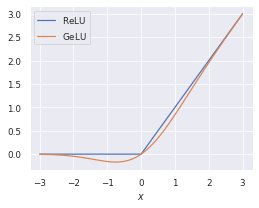

In [55]:
x = np.linspace(-3,3,1000)
stn = sta.norm()
phi = lambda x: stn.cdf(x)
gelu = lambda x: x*phi(x)
relu = lambda x: x*np.heaviside(x, 1.0)
fig, ax = plt.subplots(1,1, figsize=(4, 3))
ax.plot(x, relu(x), label=r'$\mathrm{ReLU}$')
ax.plot(x, gelu(x), label=r'$\mathrm{GeLU}$')
ax.set_xlabel(r'$x$')
ax.legend()
fig.savefig('plots/relugelu.png', dpi=500, bbox_inches="tight")

In [56]:
def rms_noncom(l: float, X: np.ndarray,):
    # X = np.random.randn(num_samples)
    diff = stn.cdf(l*X) -  phi(X)
    rms = np.sqrt(np.mean((X*diff)**2))
    return l * rms

In [57]:
l = np.linspace(1e-9, 2, 1000)
nc = np.zeros_like(l)

In [58]:
X = np.random.randn(int(1e5))

In [59]:
for i, m in enumerate(l):
    nc[i] = rms_noncom(m, X)

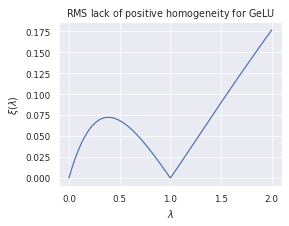

In [60]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(l, nc)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\xi(\lambda)$')
ax.set_title(r'RMS lack of positive homogeneity for $\mathrm{GeLU}$')
fig.savefig('plots/gelu_noncom.png', dpi=500, bbox_inches="tight")

In [61]:
X = np.random.randn(int(1e7))
limit_slope = np.sqrt(np.mean((X*(np.heaviside(X, 1.0)-phi(X)))**2))

In [62]:
limit_slope

0.12674722110184825